
# opinion polling from recent national elections. 

## original idea

### why?

Opinion polling is widely cited, being the only concrete metric available ahead of the election. If we only listen to the news, it would seem that 2016 and 2017 have been full of surprising election results. Were they really that surprising though? I intend to look at some of the more widely publicized (in Western media at least) national elections from the last few years to see if a) opinion polls were at all representative of the final result, and b) was there a "best" form of polling?

This isn't a doctoral thesis, or even a blog post, so I'm only going to be taking a look at select elections. My key requirements are straight forward: The election must have been both widely publicized and have easily accessible, well formatted data. At the risk of over-representing America, I chose the following:
* Canadian federal election, 2015
* United States presidential election, 2016
* United States Democratic and Republican party preseidential primaries, 2016
* French presidential election, 2017
* Dutch general election, 2017
* South Korean presidential election, 2017


### sources
* https://en.wikipedia.org/wiki/Opinion_polling_in_the_43rd_Canadian_federal_election
* https://en.wikipedia.org/wiki/Canadian_federal_election,_2015
* https://en.wikipedia.org/wiki/South_Korean_presidential_election,_2017
* https://en.wikipedia.org/wiki/Dutch_general_election,_2017
* https://en.wikipedia.org/wiki/Opinion_polling_for_the_Dutch_general_election,_2017
* https://en.wikipedia.org/wiki/United_States_presidential_election,_2016
* https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_United_States_presidential_election,_2016
* https://en.wikipedia.org/wiki/Opinion_polling_for_the_French_presidential_election,_2017
* https://en.wikipedia.org/wiki/French_presidential_election,_2017
* https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_Republican_Party_2016_presidential_primaries
* https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_Democratic_Party_2016_presidential_primaries
|

## implementation notes
* scraping has turned out to be too much of a giant pita to be worth wasting my time on. there's too many tables on each page and only small parts of some of them are relevant and those aren't named consistently. putting raw copy/pastes into gdocs and will assemble two large csvs from that.
* need to drop the dutch, their polling data doesn't include sample size, which i think is too important an indicator for polling accuracy.
* canada's a bit different. it's a parliamentary election, not a presidential, so *technically* people are voting for their local candidates. however, it's anecdotally known and is probably statistically shown that people tend to vote locally according to their favourite leader. opinion polling generally asks about the party and the leader so... /shrug.
* canada uses seat count to determine governing party and thus, the candidate that becomes PM. including popular vote and seat proportions.
* america is a little problematic thanks to the electoral college. including popular vote and electoral college proportions.
* added an "age" column to the polling data. poll dates often covered multiple days, and the dates aren't that important to us. thankfully, wikipedia editors presorted everything in reverse chronological order. each set of polling data was simply numbered from 1 to N where 1 is the newest set of poll results and N is the oldest.
* american scale makes things look wonky. their 3rd and 4th party candidates polling numbers were rounded off in the source data. this nudges the means into buckets that step by 0.05% at a time and makes the american scatter plot look a lot more orderly than it rightly should.
* again with the american scale. they have 5 polls with between 16k and 70k people. the next largest is a french poll with 8k samples. the vast majority of polls have between 1000 and 3000 samples, so i don't feel bad about cutting out these five.


In [505]:
!pip install pandas matplotlib scipy
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import numpy as np
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import gridspec
from matplotlib import patches 

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [432]:
candidates = pd.read_csv('./Polling vs Election - Clean - Candidates.csv')
polls = pd.read_csv('./Polling vs Election - Clean - Polls.csv')
results = pd.read_csv('./Polling vs Election - Clean - Results.csv')
simpleresults = pd.read_csv('./Polling vs Election - Clean - SimpleResults.csv')

In [433]:
candidates

,Country,Candidate 1,Candidate 2,Candidate 3,Candidate 4
0,United States,Hillary Clinton,Donald Trump,Gary Johnson,Jill Stein
1,France,Jean-Luc Melenchon,Emmanuel Macron,Francois Fillon,Marine Le Pen
2,South Korea,Sim Sang-jung,Moon Jae-in,Ahn Cheol-soo,Hong Jun-pyo
3,Canada,Stephen Harper,Tom Mulcair,Justin Trudeau,Gilles Duceppe


In [434]:
# need to clean up percentage signs and convert those numbers to decimals
polls[['Candidate 1','Candidate 2','Candidate 3','Candidate 4']] = polls[['Candidate 1','Candidate 2','Candidate 3','Candidate 4']].applymap(lambda x: float(x.replace('%',''))/100)

# now to clean up the commas in sample size
polls[['Sample Size']] = polls[['Sample Size']].applymap(lambda x: int(str(x).replace(',', '')))

polls

,Country,Age,Candidate 1,Candidate 2,Candidate 3,Candidate 4,Sample Size
0,United States,1,0.450,0.410,0.050,0.020,3677
1,United States,2,0.490,0.450,0.040,0.010,940
2,United States,3,0.440,0.410,0.040,0.020,799
3,United States,4,0.470,0.430,0.030,0.020,16639
4,United States,5,0.470,0.430,0.040,0.010,2220
5,United States,6,0.480,0.440,0.030,0.020,1295
6,United States,7,0.410,0.430,0.060,0.020,1026
7,United States,8,0.500,0.440,0.040,0.010,802
8,United States,9,0.420,0.390,0.060,0.030,2195
9,United States,10,0.450,0.410,0.050,0.020,1426


In [435]:
results

,Country,Type,Candidate 1,Candidate 2,Candidate 3,Candidate 4
0,United States,Electoral College,0.421933,0.565056,0.000000,0.000000
1,United States,Popular Vote,0.487653,0.468004,0.033487,0.010856
2,France,Round 1,0.195800,0.240100,0.200100,0.213000
3,France,Round 2,NaN,0.661000,NaN,0.339000
4,South Korea,Popular Vote,0.061700,0.410800,0.214100,0.240300
5,Canada,Seats,0.292900,0.130200,0.544400,0.029600
6,Canada,Popular Vote,0.319100,0.197300,0.394700,0.046700


In [436]:
simpleresults

,Country,Type,Candidate 1,Candidate 2,Candidate 3,Candidate 4
0,United States,Popular Vote,0.487653,0.468004,0.033487,0.010856
1,France,Round 1,0.195800,0.240100,0.200100,0.213000
2,South Korea,Popular Vote,0.061700,0.410800,0.214100,0.240300
3,Canada,Popular Vote,0.319100,0.197300,0.394700,0.046700


In [437]:
# compile poll summaries

In [438]:
polls_last5 = polls[polls['Age'] <= 5].groupby('Country').agg(OrderedDict([
        ('Candidate 1', np.mean),
        ('Candidate 2', np.mean),
        ('Candidate 3', np.mean),
        ('Candidate 4', np.mean)
    ]))
polls_last5.columns = [
    'Candidate 1 Polls (Mean of Last 5)', 
    'Candidate 2 Polls (Mean of Last 5)', 
    'Candidate 3 Polls (Mean of Last 5)', 
    'Candidate 4 Polls (Mean of Last 5)'
]
polls_last5

,Candidate 1 Polls (Mean of Last 5),Candidate 2 Polls (Mean of Last 5),Candidate 3 Polls (Mean of Last 5),Candidate 4 Polls (Mean of Last 5)
Country,,,,
Canada,0.314,0.2042,0.3764,0.0496
France,0.191,0.2420,0.1920,0.2250
South Korea,0.079,0.3858,0.1914,0.1676
United States,0.464,0.4260,0.0400,0.0160


In [439]:
polls_last15 = polls[polls['Age'] <= 15].groupby('Country').agg(OrderedDict([
        ('Candidate 1', np.mean),
        ('Candidate 2', np.mean),
        ('Candidate 3', np.mean),
        ('Candidate 4', np.mean)
    ]))
polls_last15.columns = [
    'Candidate 1 Polls (Mean of Last 15)', 
    'Candidate 2 Polls (Mean of Last 15)', 
    'Candidate 3 Polls (Mean of Last 15)', 
    'Candidate 4 Polls (Mean of Last 15)'
]
polls_last15

,Candidate 1 Polls (Mean of Last 15),Candidate 2 Polls (Mean of Last 15),Candidate 3 Polls (Mean of Last 15),Candidate 4 Polls (Mean of Last 15)
Country,,,,
Canada,0.313933,0.217267,0.368467,0.047467
France,0.189333,0.239000,0.195667,0.222333
South Korea,0.080800,0.396933,0.201667,0.181267
United States,0.457333,0.422000,0.048000,0.019333


In [440]:
polls_lastmonth = polls.groupby('Country').agg(OrderedDict([
        ('Candidate 1', np.mean),
        ('Candidate 2', np.mean),
        ('Candidate 3', np.mean),
        ('Candidate 4', np.mean)
    ]))
polls_lastmonth.columns = [
    'Candidate 1 Polls (Mean of Last Month)', 
    'Candidate 2 Polls (Mean of Last Month)', 
    'Candidate 3 Polls (Mean of Last Month)', 
    'Candidate 4 Polls (Mean of Last Month)'
]
polls_lastmonth

,Candidate 1 Polls (Mean of Last Month),Candidate 2 Polls (Mean of Last Month),Candidate 3 Polls (Mean of Last Month),Candidate 4 Polls (Mean of Last Month)
Country,,,,
Canada,0.315764,0.246708,0.334903,0.044486
France,0.187561,0.233902,0.193537,0.227195
South Korea,0.061643,0.406929,0.262321,0.134143
United States,0.449115,0.413009,0.055044,0.022212


In [441]:
polls_aggs = polls_last5.merge(polls_last15, left_index=True, right_index=True).merge(polls_lastmonth, left_index=True, right_index=True)
polls_aggs

,Candidate 1 Polls (Mean of Last 5),Candidate 2 Polls (Mean of Last 5),Candidate 3 Polls (Mean of Last 5),Candidate 4 Polls (Mean of Last 5),Candidate 1 Polls (Mean of Last 15),Candidate 2 Polls (Mean of Last 15),Candidate 3 Polls (Mean of Last 15),Candidate 4 Polls (Mean of Last 15),Candidate 1 Polls (Mean of Last Month),Candidate 2 Polls (Mean of Last Month),Candidate 3 Polls (Mean of Last Month),Candidate 4 Polls (Mean of Last Month)
Country,,,,,,,,,,,,
Canada,0.314,0.2042,0.3764,0.0496,0.313933,0.217267,0.368467,0.047467,0.315764,0.246708,0.334903,0.044486
France,0.191,0.2420,0.1920,0.2250,0.189333,0.239000,0.195667,0.222333,0.187561,0.233902,0.193537,0.227195
South Korea,0.079,0.3858,0.1914,0.1676,0.080800,0.396933,0.201667,0.181267,0.061643,0.406929,0.262321,0.134143
United States,0.464,0.4260,0.0400,0.0160,0.457333,0.422000,0.048000,0.019333,0.449115,0.413009,0.055044,0.022212


In [442]:
# calculate poll deviation
results_dev = results.copy()
results_dev.columns = ['Country', 'Type'] + ['Candidate {} Result'.format(x) for x in range(1,5)]


for col in polls_aggs.columns:
    acc_col_name = col.replace('Polls', 'Poll Offset')
    candidate = col[0:11]
    acc_col = []
    for idx, row in results_dev.iterrows():
        acc_col.append((row["{} Result".format(candidate)] - polls_aggs[col][row['Country']]))
    results_dev[acc_col_name] = pd.Series(acc_col)

results_dev
        
      
        

,Country,Type,Candidate 1 Result,Candidate 2 Result,Candidate 3 Result,Candidate 4 Result,Candidate 1 Poll Offset (Mean of Last 5),Candidate 2 Poll Offset (Mean of Last 5),Candidate 3 Poll Offset (Mean of Last 5),Candidate 4 Poll Offset (Mean of Last 5),Candidate 1 Poll Offset (Mean of Last 15),Candidate 2 Poll Offset (Mean of Last 15),Candidate 3 Poll Offset (Mean of Last 15),Candidate 4 Poll Offset (Mean of Last 15),Candidate 1 Poll Offset (Mean of Last Month),Candidate 2 Poll Offset (Mean of Last Month),Candidate 3 Poll Offset (Mean of Last Month),Candidate 4 Poll Offset (Mean of Last Month)
0,United States,Electoral College,0.421933,0.565056,0.000000,0.000000,-0.042067,0.139056,-0.040000,-0.016000,-0.035400,0.143056,-0.048000,-0.019333,-0.027182,0.152047,-0.055044,-0.022212
1,United States,Popular Vote,0.487653,0.468004,0.033487,0.010856,0.023653,0.042004,-0.006513,-0.005144,0.030320,0.046004,-0.014513,-0.008478,0.038538,0.054995,-0.021557,-0.011357
2,France,Round 1,0.195800,0.240100,0.200100,0.213000,0.004800,-0.001900,0.008100,-0.012000,0.006467,0.001100,0.004433,-0.009333,0.008239,0.006198,0.006563,-0.014195
3,France,Round 2,NaN,0.661000,NaN,0.339000,NaN,0.419000,NaN,0.114000,NaN,0.422000,NaN,0.116667,NaN,0.427098,NaN,0.111805
4,South Korea,Popular Vote,0.061700,0.410800,0.214100,0.240300,-0.017300,0.025000,0.022700,0.072700,-0.019100,0.013867,0.012433,0.059033,0.000057,0.003871,-0.048221,0.106157
5,Canada,Seats,0.292900,0.130200,0.544400,0.029600,-0.021100,-0.074000,0.168000,-0.020000,-0.021033,-0.087067,0.175933,-0.017867,-0.022864,-0.116508,0.209497,-0.014886
6,Canada,Popular Vote,0.319100,0.197300,0.394700,0.046700,0.005100,-0.006900,0.018300,-0.002900,0.005167,-0.019967,0.026233,-0.000767,0.003336,-0.049408,0.059797,0.002214


In [443]:
[print("{} - {}".format(row['Country'], row['Type'])) for idx, row in results.iterrows()]

United States - Electoral College
United States - Popular Vote
France - Round 1
France - Round 2
South Korea - Popular Vote
Canada - Seats
Canada - Popular Vote


[None, None, None, None, None, None, None]

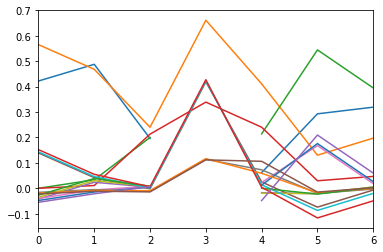

In [444]:
results_dev.plot(legend=False)

In [445]:
polls

,Country,Age,Candidate 1,Candidate 2,Candidate 3,Candidate 4,Sample Size
0,United States,1,0.450,0.410,0.050,0.020,3677
1,United States,2,0.490,0.450,0.040,0.010,940
2,United States,3,0.440,0.410,0.040,0.020,799
3,United States,4,0.470,0.430,0.030,0.020,16639
4,United States,5,0.470,0.430,0.040,0.010,2220
5,United States,6,0.480,0.440,0.030,0.020,1295
6,United States,7,0.410,0.430,0.060,0.020,1026
7,United States,8,0.500,0.440,0.040,0.010,802
8,United States,9,0.420,0.390,0.060,0.030,2195
9,United States,10,0.450,0.410,0.050,0.020,1426


In [446]:
polls_ia = polls.copy()
collist = ['Candidate 1', 'Candidate 2', 'Candidate 3', 'Candidate 4']

for idx, row in polls_ia.iterrows():
    for col in collist:
        result = simpleresults[simpleresults['Country'] == row['Country']][col].tolist()[0]
        polls_ia.set_value(idx, col, (row[col] - result))

newcollist = ["{} Offset".format(x) if x in collist else x for x in polls_ia.columns.tolist()]
polls_ia.columns = newcollist
polls_ia['Mean Offset'] = polls_ia[["{} Offset".format(x) for x in collist]].mean(axis=1)
polls_ia.head()

,Country,Age,Candidate 1 Offset,Candidate 2 Offset,Candidate 3 Offset,Candidate 4 Offset,Sample Size,Mean Offset
0,United States,1,-0.037653,-0.058004,0.016513,0.009144,3677,-0.0175
1,United States,2,0.002347,-0.018004,0.006513,-0.000856,940,-0.0025
2,United States,3,-0.047653,-0.058004,0.006513,0.009144,799,-0.0225
3,United States,4,-0.017653,-0.038004,-0.003487,0.009144,16639,-0.0125
4,United States,5,-0.017653,-0.038004,0.006513,-0.000856,2220,-0.0125


In [447]:
polls_ia.sort_values(['Sample Size'], ascending=[0])

,Country,Age,Candidate 1 Offset,Candidate 2 Offset,Candidate 3 Offset,Candidate 4 Offset,Sample Size,Mean Offset
11,United States,12,-0.017653,-0.058004,0.026513,0.019144,70194,-0.007500
46,United States,47,-0.017653,-0.058004,0.026513,0.019144,40816,-0.007500
80,United States,81,-0.027653,-0.058004,0.036513,0.019144,32225,-0.007500
99,United States,100,-0.027653,-0.068004,0.046513,0.029144,24804,-0.005000
3,United States,4,-0.017653,-0.038004,-0.003487,0.009144,16639,-0.012500
128,France,16,-0.005800,-0.010100,-0.005100,0.012000,8274,-0.002250
241,Canada,32,0.040900,0.002700,-0.044700,-0.006700,5630,-0.001950
221,Canada,12,0.010900,0.012700,-0.014700,-0.006700,5546,0.000550
37,United States,38,-0.027653,-0.018004,0.006513,0.009144,5360,-0.007500
255,Canada,46,0.050900,0.042700,-0.104700,-0.006700,5197,-0.004450


In [448]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


# the americans have a few HUGE samples that throw off everything
polls_ia_filtered = polls_ia.copy()[~is_outlier(polls_ia['Sample Size'], 20)]
polls_ia_filtered.sort_values(['Sample Size'], ascending=[0])

,Country,Age,Candidate 1 Offset,Candidate 2 Offset,Candidate 3 Offset,Candidate 4 Offset,Sample Size,Mean Offset
128,France,16,-0.005800,-0.010100,-0.005100,0.012000,8274,-0.002250
241,Canada,32,0.040900,0.002700,-0.044700,-0.006700,5630,-0.001950
221,Canada,12,0.010900,0.012700,-0.014700,-0.006700,5546,0.000550
37,United States,38,-0.027653,-0.018004,0.006513,0.009144,5360,-0.007500
255,Canada,46,0.050900,0.042700,-0.104700,-0.006700,5197,-0.004450
212,Canada,3,0.000900,0.012700,-0.004700,-0.016700,5063,-0.001950
267,Canada,58,0.000900,0.072700,-0.104700,0.003300,3814,-0.006950
0,United States,1,-0.037653,-0.058004,0.016513,0.009144,3677,-0.017500
240,Canada,31,-0.019100,0.042700,-0.044700,0.003300,3417,-0.004450
171,South Korea,18,0.022300,-0.033800,-0.023100,-0.091300,3077,-0.031475


In [449]:
np.mean([-0.067653, -0.058004])

-0.062828500000000009

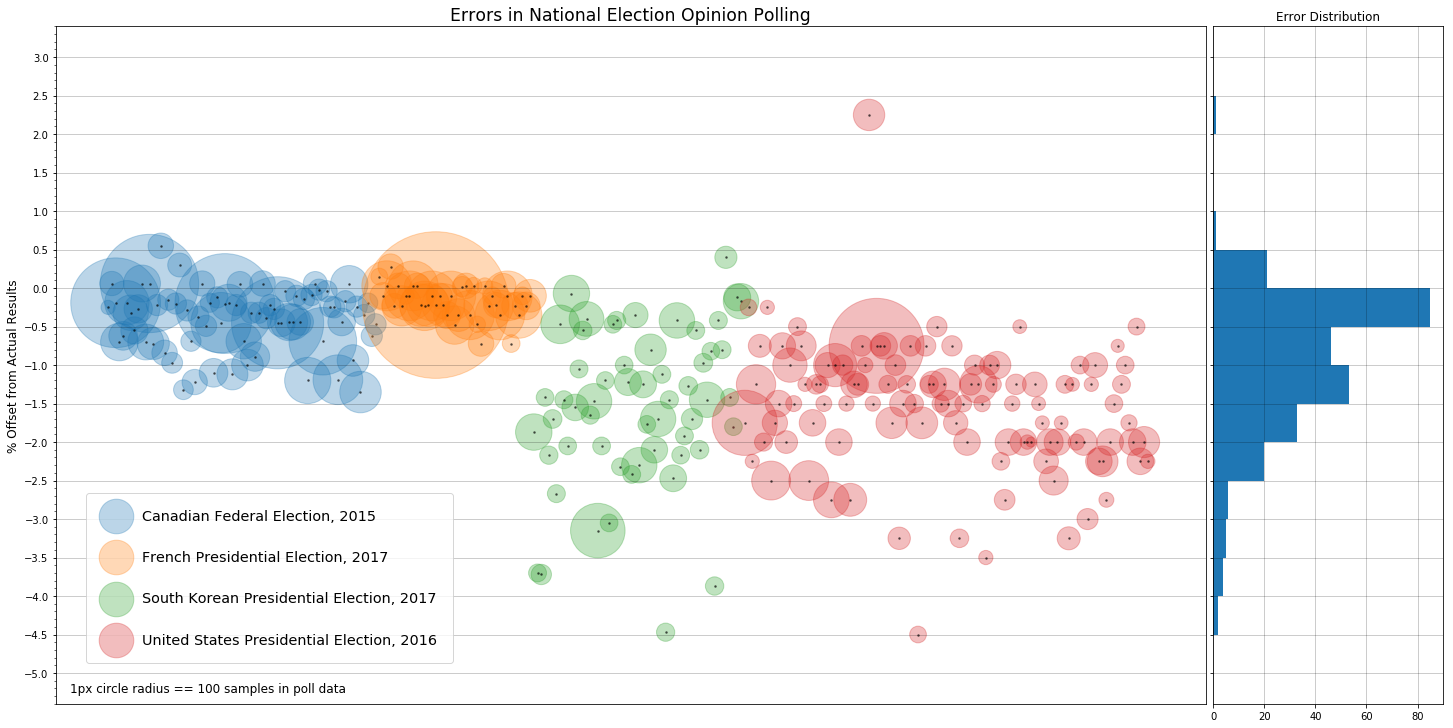

In [514]:
### avg accuracy v. sample size

# setup
data = polls_ia_filtered.copy()
data['Mean Offset'] = data['Mean Offset'].apply(lambda x: round(x, 4)*100)
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
plt.tight_layout()
width = 0

# plot scatters by country
countries_grp = data.groupby('Country')
scatters = []
for name, group in countries_grp:
    x = np.arange(width, width+len(group), 1)
    areas = np.pi * (group['Sample Size'] / 100)**2 # 100 people = 1px radius
    y = group['Mean Offset']
    scatters.append((
        name,
        ax1.scatter(x, y,label=name, s=areas, alpha=0.3, marker='o'),
        ax1.scatter(x, y,label=name, alpha=0.5, marker='.', s=10, color='black')
    ))
    width += len(group)

# set up the legend and title
ax1.set_title('Errors in National Election Opinion Polling', fontsize='xx-large')
ax1.text(-10, -5.25, '1px circle radius == 100 samples in poll data', fontsize='large')
legend = ax1.legend(
    [s[1] for s in scatters], 
    [
        'Canadian Federal Election, 2015', 
        'French Presidential Election, 2017',
        'South Korean Presidential Election, 2017',
        'United States Presidential Election, 2016',
        '1px circle radius == 100 samples in poll date'
    ],  
    loc='lower left',
    fancybox=True,
    bbox_to_anchor=(0.02, 0.05),
    labelspacing=1.9, 
    fontsize='x-large', 
    borderpad=1.1
);
for x in range(0,4):
    legend.legendHandles[x]._sizes = [1200];

# remove x ticks altogether
ax1.xaxis.set_major_locator(plt.NullLocator())

# set major y tickets at .5 intervals, minors at .1
ax1.set_ylabel('% Offset from Actual Results', fontsize='large')
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
for ymaj in ax1.yaxis.get_majorticklocs():
    ax1.axhline(y=ymaj, ls='-', linewidth=1, alpha=0.2, c='black')

# add histogram
bins = np.arange(
    -5.5,
    3.5,
    0.5
)
ax2.hist(data['Mean Offset'], bins=bins, orientation='horizontal')

# set up histogram axes
ax2.set_title('Error Distribution')
ax2.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1])
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.set_yticklabels([])
for ymaj in ax2.yaxis.get_majorticklocs():
    ax2.axhline(y=ymaj, ls='-', linewidth=1, alpha=0.2, c='black')
ax2.set_xlim(0,90)
for xmaj in ax2.xaxis.get_majorticklocs():
    ax2.axvline(x=xmaj, ls='-', linewidth=1, alpha=0.2, c='black')

# tighten up the layout
plt.subplots_adjust(wspace=0.01, hspace=0)

-0.044999999995000012